In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
sns.set(color_codes=True)
import copy

In [2]:
sns.set()

In [3]:
wc = pd.read_csv('Wholesale_Customers_Data.csv')
wc.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
wc.drop(['Buyer/Spender'], axis=1, inplace=True)
wc['Total'] = wc.sum(axis=1)
wc.head()

In [46]:
wc.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


Region wise spending is 

                Fresh         Milk      Grocery       Frozen  Detergents_Paper  \
Region                                                                          
Lisbon  11101.727273  5486.415584  7403.077922  3000.337662       2651.116883   
Oporto   9887.680851  5088.170213  9218.595745  4045.361702       3687.468085   
Other   12533.471519  5977.085443  7896.363924  2944.594937       2817.753165   

        Delicatessen         Total  
Region                              
Lisbon   1354.896104  30997.571429  
Oporto   1159.702128  33086.978723  
Other    1620.601266  33789.870253  


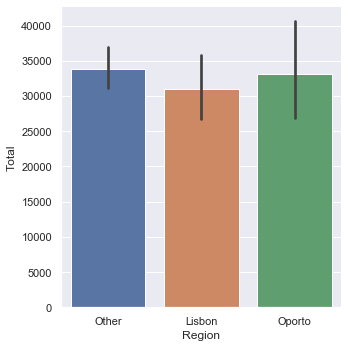

In [51]:
a = wc.groupby('Region').mean()
print('Region wise spending is \n\n', a)
sns.catplot(x='Region', y='Total', kind='bar', data=wc)

Channel wise spending is 

                 Fresh          Milk       Grocery       Frozen  \
Channel                                                          
Hotel    13475.560403   3451.724832   3962.137584  3748.251678   
Retail    8904.323944  10716.500000  16322.852113  1652.612676   

         Detergents_Paper  Delicatessen         Total  
Channel                                                
Hotel          790.560403   1415.956376  26844.191275  
Retail        7269.507042   1753.436620  46619.232394  


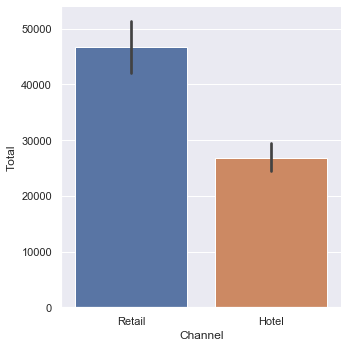

In [52]:
b = wc.groupby('Channel').mean()
print('Channel wise spending is \n\n', b)
sns.catplot(x='Channel', y='Total', kind='bar', data=wc)

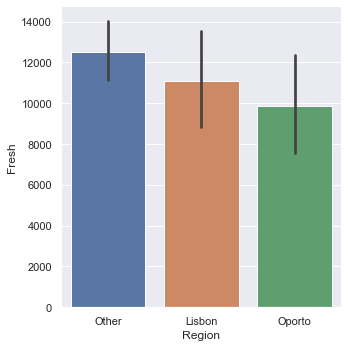

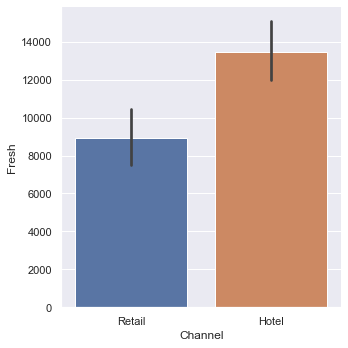

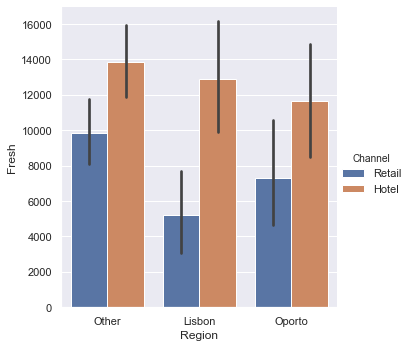

In [9]:
# Category wise charts
sns.catplot(x='Region', y='Fresh', kind='bar', data=wc)
sns.catplot(x='Channel', y='Fresh', kind='bar', data=wc)
sns.catplot(x='Region', y='Fresh', hue='Channel', kind='bar', data=wc)

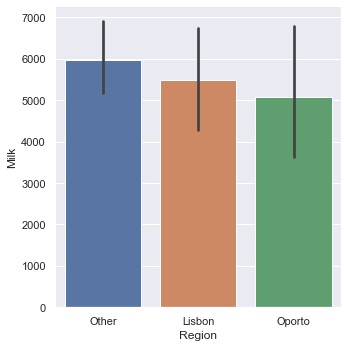

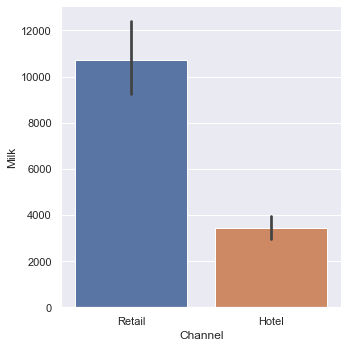

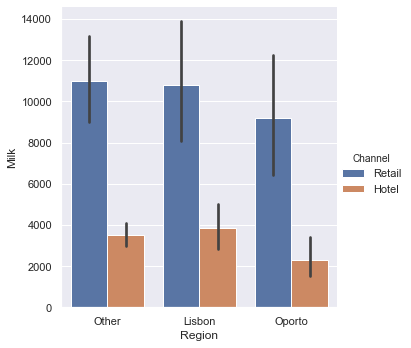

In [11]:
sns.catplot(x='Region', y='Milk', kind='bar', data=wc)
sns.catplot(x='Channel', y='Milk', kind='bar', data=wc)
sns.catplot(x='Region', y='Milk', hue='Channel', kind='bar', data=wc)

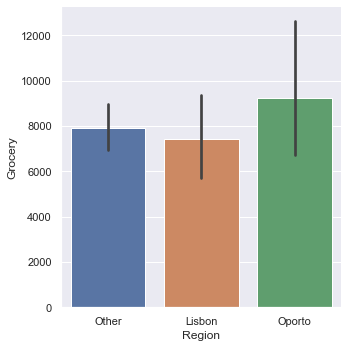

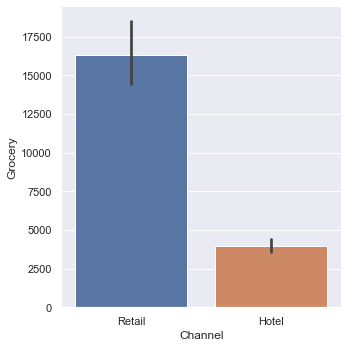

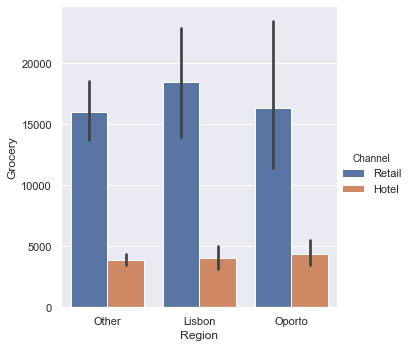

In [11]:
sns.catplot(x='Region', y='Grocery', kind='bar', data=wc)
sns.catplot(x='Channel', y='Grocery', kind='bar', data=wc)
sns.catplot(x='Region', y='Grocery', hue='Channel', kind='bar', data=wc)

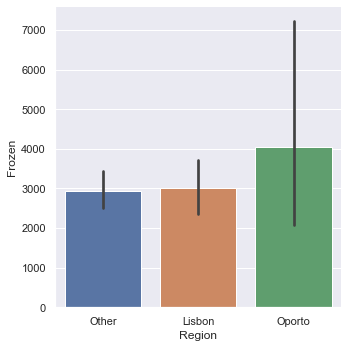

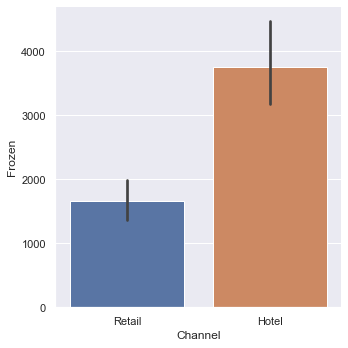

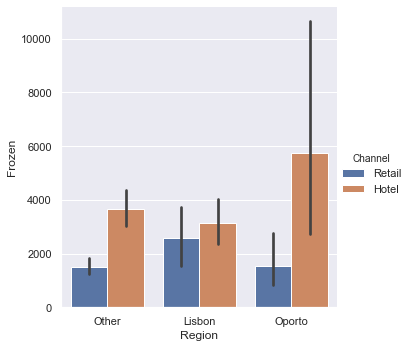

In [12]:
sns.catplot(x='Region', y='Frozen', kind='bar', data=wc)
sns.catplot(x='Channel', y='Frozen', kind='bar', data=wc)
sns.catplot(x='Region', y='Frozen', hue='Channel', kind='bar', data=wc)

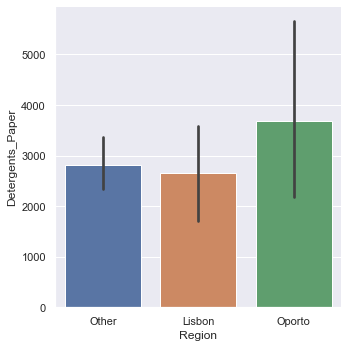

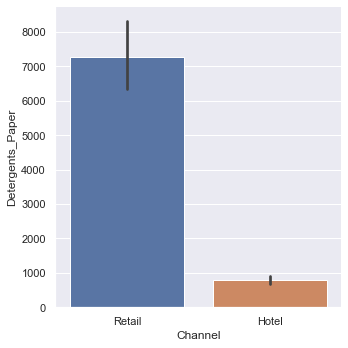

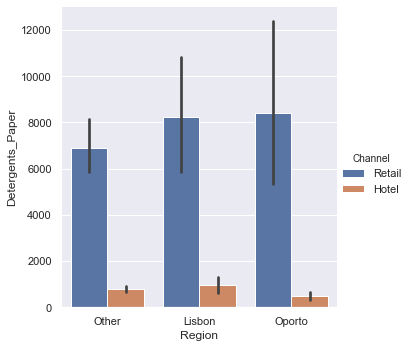

In [13]:
sns.catplot(x='Region', y='Detergents_Paper', kind='bar', data=wc)
sns.catplot(x='Channel', y='Detergents_Paper', kind='bar', data=wc)
sns.catplot(x='Region', y='Detergents_Paper', hue='Channel', kind='bar', data=wc)

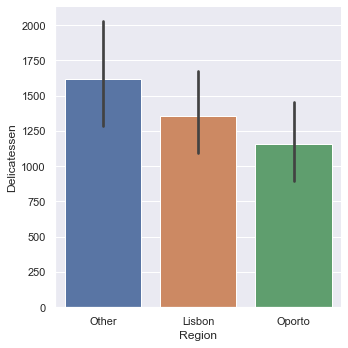

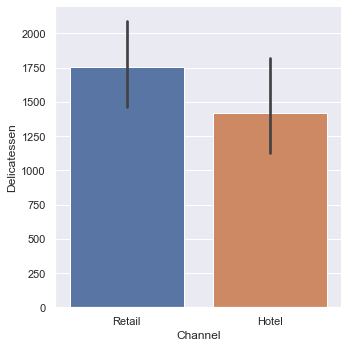

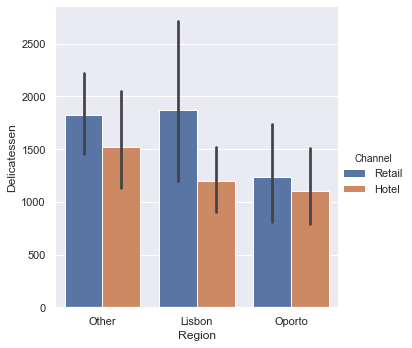

In [14]:
sns.catplot(x='Region', y='Delicatessen', kind='bar', data=wc)
sns.catplot(x='Channel', y='Delicatessen', kind='bar', data=wc)
sns.catplot(x='Region', y='Delicatessen', hue='Channel', kind='bar', data=wc)

In [37]:
# Extracting categories to get the mean.
categories= wc.iloc[:, 2:8]
categories.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [38]:
# Standard Deviation
categories.std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [40]:
# Coefficient of variation for measuring consistency
Consistency = categories.std()/categories.mean()
print (Consistency)

Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64


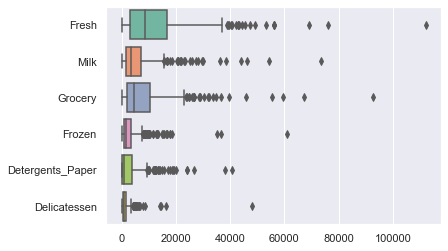

In [41]:
sns.boxplot(data=categories, orient='h', palette='Set2')

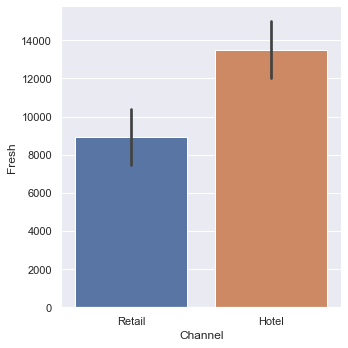

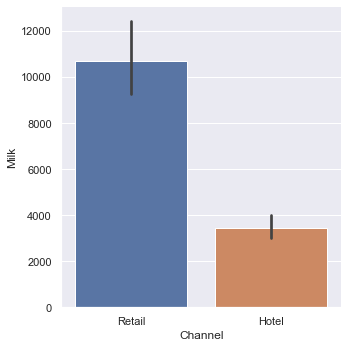

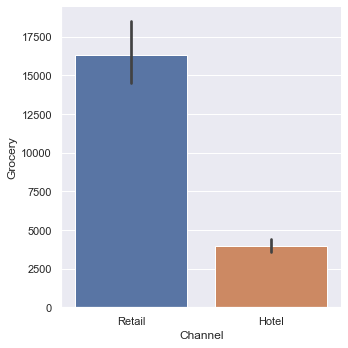

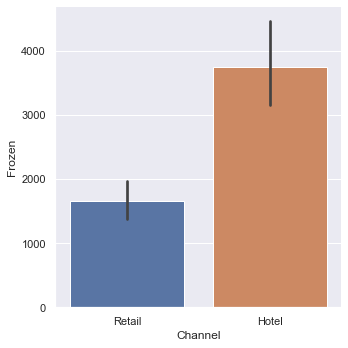

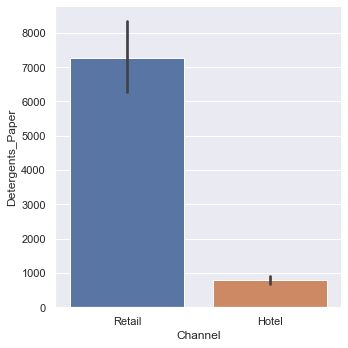

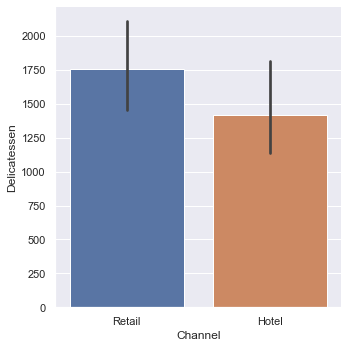

In [53]:
# Channel wise spending
sns.catplot(x='Channel', y='Fresh', kind='bar', data=wc)
sns.catplot(x='Channel', y='Milk', kind='bar', data=wc)
sns.catplot(x='Channel', y='Grocery', kind='bar', data=wc)
sns.catplot(x='Channel', y='Frozen', kind='bar', data=wc)
sns.catplot(x='Channel', y='Detergents_Paper', kind='bar', data=wc)
sns.catplot(x='Channel', y='Delicatessen', kind='bar', data=wc)

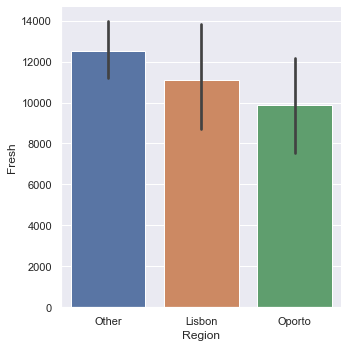

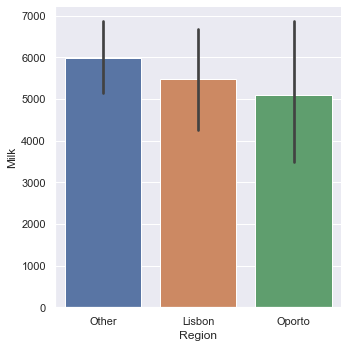

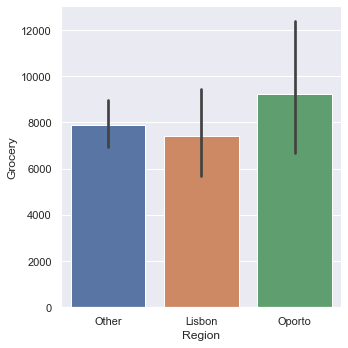

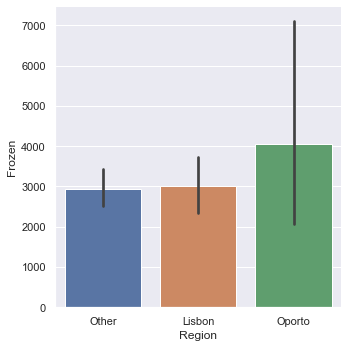

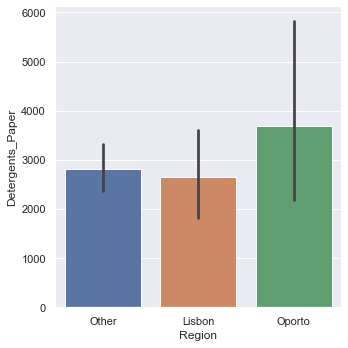

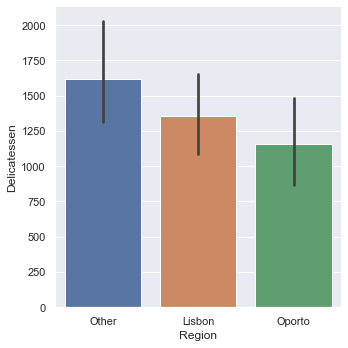

In [54]:
# Region wise spending
sns.catplot(x='Region', y='Fresh', kind='bar', data=wc)
sns.catplot(x='Region', y='Milk', kind='bar', data=wc)
sns.catplot(x='Region', y='Grocery', kind='bar', data=wc)
sns.catplot(x='Region', y='Frozen', kind='bar', data=wc)
sns.catplot(x='Region', y='Detergents_Paper', kind='bar', data=wc)
sns.catplot(x='Region', y='Delicatessen', kind='bar', data=wc)